In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [21]:
path = './data/'
df_list = []
for file in os.listdir(path):
    df_file = pd.read_excel(path + file)
    df_list.append(df_file)
df = pd.concat(df_list)

In [22]:
df.head()

,REGIAO_EXERC,DE_EXERC,CIE_ESCOLA,UA_EXERC,NOME_UA_EXERC,MUNICIPIO_EXERC,QUADRO_EXERC,CARGO_EXERC,NOME_CARGO_EXERC,CATEG_E,TT_DIAS_FALTA_JUST,TT_DIAS_FALTA_INJUST,TT_DIAS_FALTA_ABONADA,TT_DIAS_LIC_PREMIO,TT_DIAS_LIC_GESTANTE,TT_DIAS_LIC_ACID_TRAB,TT_DIAS_LIC_INTER_PARTIC,TOTAL_DIAS_MES,id_interno,Mês_Ano,TOTAL_DIAS_MES.1
0,INTERIOR,D.E.REG. SANTOS,11423,41518,EE HUMBERTO A.C.BRANCO-MAL.,CUBATAO,QM-DOCENTE,6409,PROFESSOR EDUCACAO BASICA II,A,0,0,0,0,0,0,0,31,238818,2019-01-01,31
1,INTERIOR,D.E.REG. SANTOS,11435,41515,EE AFONSO SCHIMIDT,CUBATAO,QM-DOCENTE,6409,PROFESSOR EDUCACAO BASICA II,F,0,0,0,0,0,0,0,31,138234,2019-01-01,31
2,INTERIOR,D.E.REG. SANTOS,11642,41513,EE ZENON CLEANTES MOURA-PROF.,CUBATAO,QM-DOCENTE,6409,PROFESSOR EDUCACAO BASICA II,A,0,0,0,0,0,0,0,31,230720,2019-01-01,31
3,INTERIOR,D.E.REG. SANTOS,11812,41542,EE FERNANDO AZEVEDO-PROF.,SANTOS,QM-DOCENTE,6409,PROFESSOR EDUCACAO BASICA II,A,0,0,0,0,0,0,31,31,229709,2019-01-01,31
4,INTERIOR,D.E.REG. SANTOS,11812,41542,EE FERNANDO AZEVEDO-PROF.,SANTOS,QM-DOCENTE,6409,PROFESSOR EDUCACAO BASICA II,A,0,0,0,0,31,0,0,31,155125,2019-01-01,31


In [23]:
df['Mês'] = df['Mês_Ano'].apply(lambda x: x.month_name(locale="pt_BR"))

In [24]:
drop_columns = ['UA_EXERC', 'CARGO_EXERC', 'id_interno', 'TOTAL_DIAS_MES',
                'TOTAL_DIAS_MES.1', 'CIE_ESCOLA', 'Mês_Ano', 'REGIAO_EXERC']
df.drop(drop_columns,axis=1,inplace=True)

In [25]:
str_columns = df.select_dtypes('object').columns
for column in str_columns:
    df[column] = df[column].apply(lambda x: x.strip())

In [26]:
df.dtypes

DE_EXERC                    object
NOME_UA_EXERC               object
MUNICIPIO_EXERC             object
QUADRO_EXERC                object
NOME_CARGO_EXERC            object
CATEG_E                     object
TT_DIAS_FALTA_JUST           int64
TT_DIAS_FALTA_INJUST         int64
TT_DIAS_FALTA_ABONADA        int64
TT_DIAS_LIC_PREMIO           int64
TT_DIAS_LIC_GESTANTE         int64
TT_DIAS_LIC_ACID_TRAB        int64
TT_DIAS_LIC_INTER_PARTIC     int64
Mês                         object
dtype: object

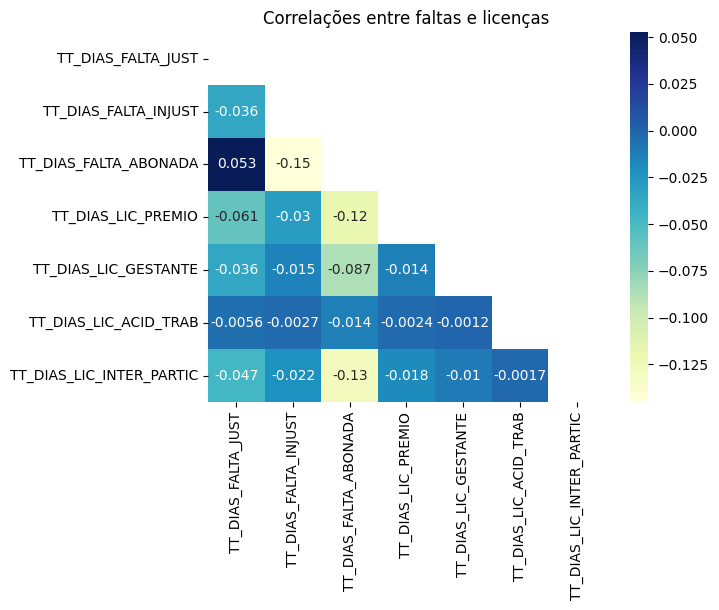

In [62]:
plt.title('Correlações entre faltas e licenças')
corr = df.select_dtypes('number').corr()
mask_matrix = np.triu(corr)
sns.heatmap(corr,annot=True,mask=mask_matrix,cmap='YlGnBu')
plt.show()

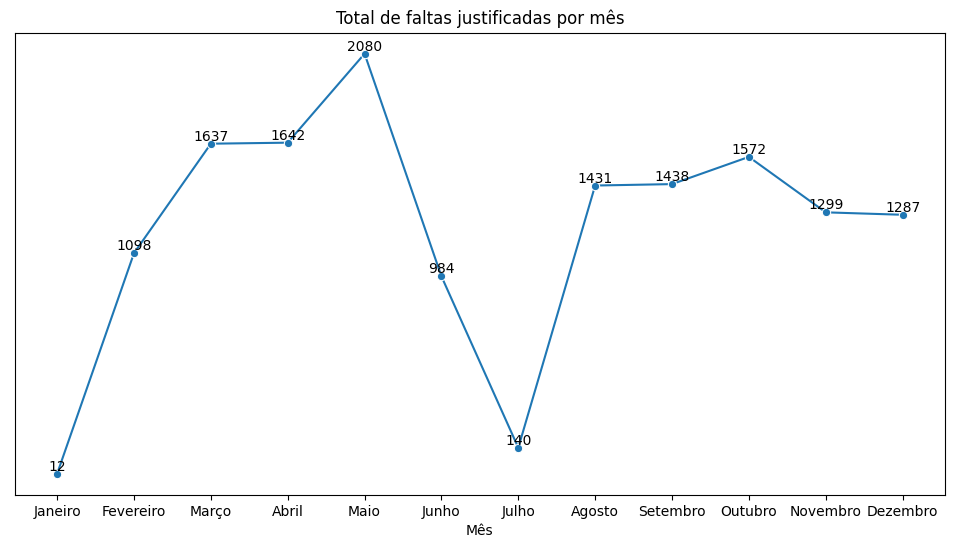

In [64]:
def sorter(column):
    reorder = df['Mês'].unique()
    cat = pd.Categorical(column, categories=reorder, ordered=True)
    return pd.Series(cat)

mes_falta_just = df.groupby('Mês')['TT_DIAS_FALTA_JUST'].sum().sort_index(key=sorter)
plt.figure(figsize=(12, 6))
plt.title('Total de faltas justificadas por mês')
ax = sns.lineplot(x=mes_falta_just.index, y=mes_falta_just.values,marker='o')
for line in ax.lines:
    x, y = line.get_xydata().T
    for xi, yi in zip(x, y):
        ax.text(xi, yi, f'{yi:.0f}', ha='center', va='bottom')
plt.yticks([])
plt.ylabel('')
plt.show()

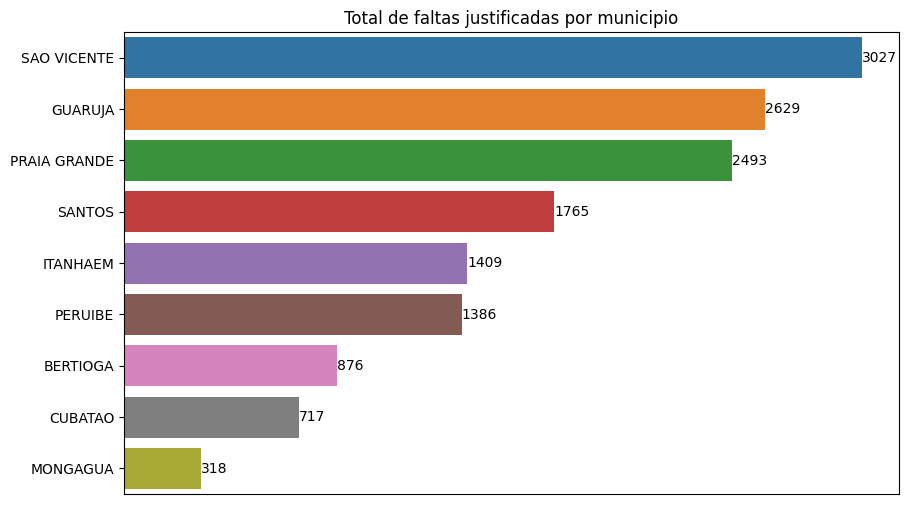

In [30]:
mun_falta_just = df.groupby('MUNICIPIO_EXERC')['TT_DIAS_FALTA_JUST'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.title('Total de faltas justificadas por municipio')
ax = sns.barplot(y=mun_falta_just.index, x=mun_falta_just.values)
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel('')
plt.xticks([])  
plt.show()

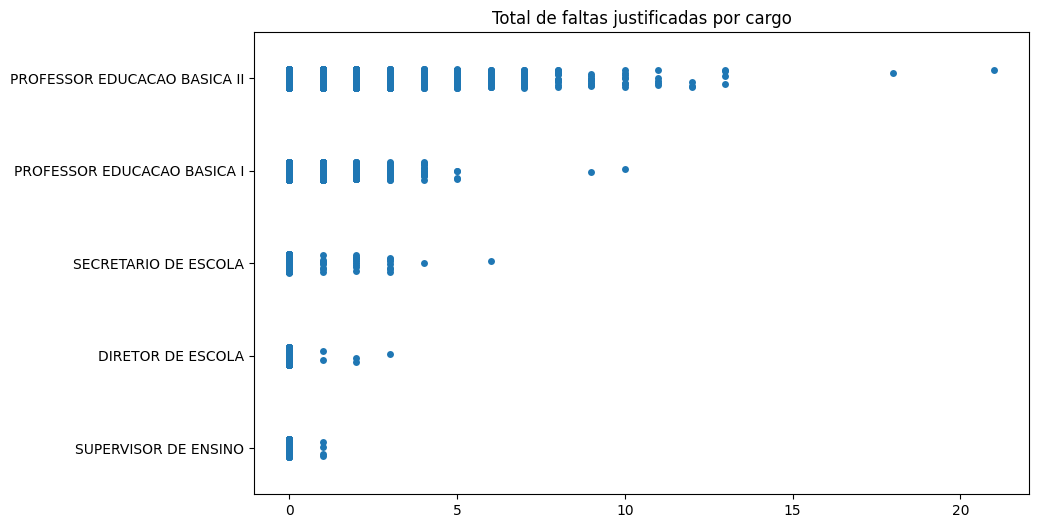

In [80]:
plt.figure(figsize=(10, 6))
plt.title('Total de faltas justificadas por cargo')
sns.stripplot(data=df, y='NOME_CARGO_EXERC', x='TT_DIAS_FALTA_JUST')
plt.ylabel('')
plt.xlabel('')
plt.show()

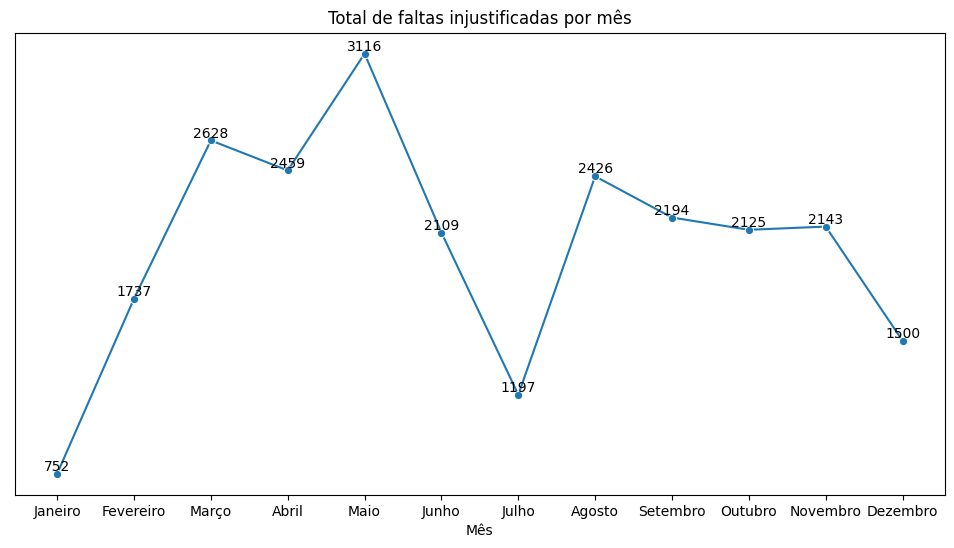

In [165]:
def sorter(column):
    reorder = df['Mês'].unique()
    cat = pd.Categorical(column, categories=reorder, ordered=True)
    return pd.Series(cat)


mes_falta_injust = df.groupby('Mês')['TT_DIAS_FALTA_INJUST'].sum().sort_index(key=sorter)
plt.figure(figsize=(12, 6))
plt.title('Total de faltas injustificadas por mês')
ax = sns.lineplot(x=mes_falta_injust.index, y=mes_falta_injust.values, marker='o')
for line in ax.lines:
    x, y = line.get_xydata().T
    for xi, yi in zip(x, y):
        ax.text(xi, yi, f'{yi:.0f}', ha='center', va='bottom')
plt.yticks([])
plt.ylabel('')
plt.show()

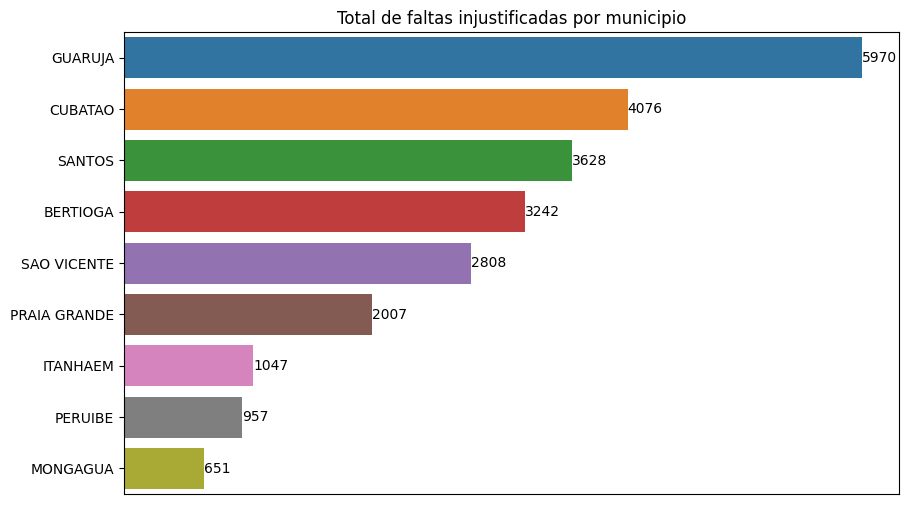

In [84]:
mun_falta_injust = df.groupby('MUNICIPIO_EXERC')['TT_DIAS_FALTA_INJUST'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.title('Total de faltas injustificadas por municipio')
ax = sns.barplot(y=mun_falta_injust.index, x=mun_falta_injust.values)
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel('')
plt.xticks([])
plt.show()

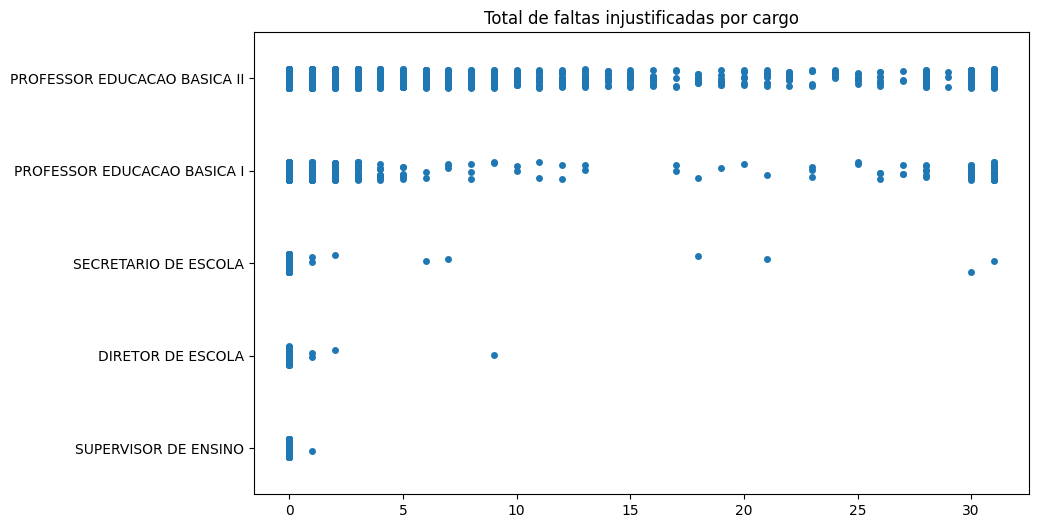

In [90]:
plt.figure(figsize=(10, 6))
plt.title('Total de faltas injustificadas por cargo')
sns.stripplot(data=df, y='NOME_CARGO_EXERC', x='TT_DIAS_FALTA_INJUST')
plt.ylabel('')
plt.xlabel('')
plt.show()

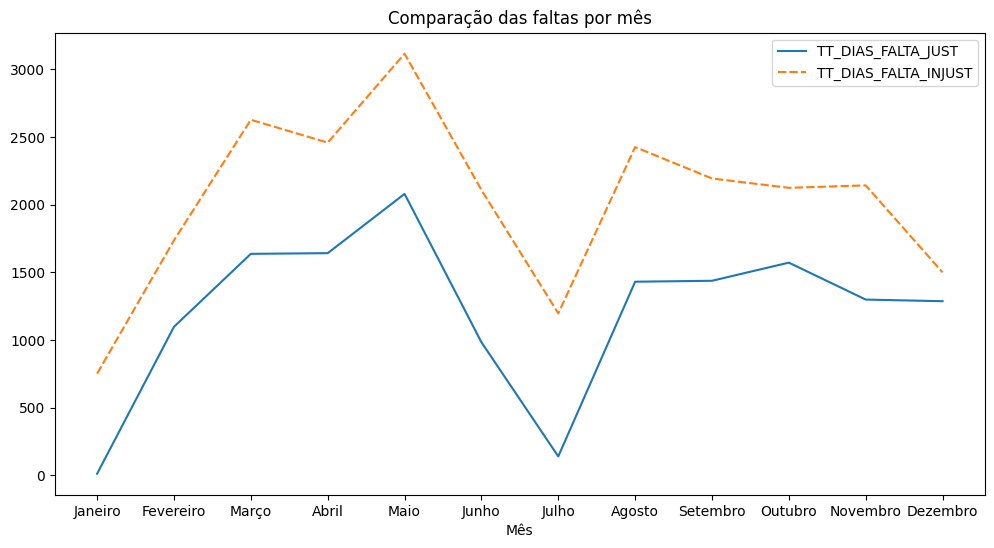

In [120]:
def sorter(column):
    reorder = df['Mês'].unique()
    cat = pd.Categorical(column, categories=reorder, ordered=True)
    return pd.Series(cat)


mes_faltas = df.groupby('Mês')[['TT_DIAS_FALTA_JUST', 'TT_DIAS_FALTA_INJUST']].sum().sort_values(by='Mês', key=sorter)
plt.figure(figsize=(12, 6))
plt.title('Comparação das faltas por mês')
ax = sns.lineplot(data=mes_faltas)
plt.show()

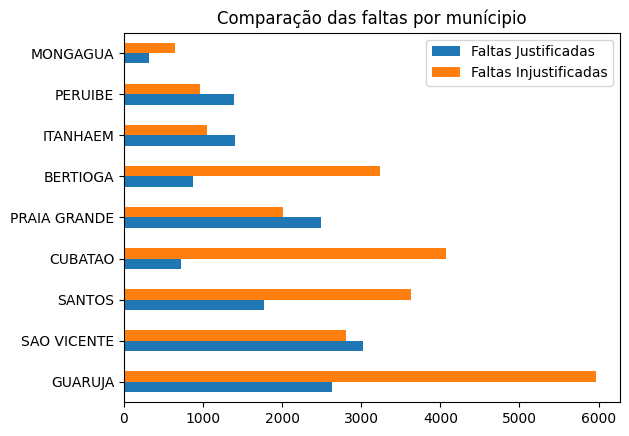

In [154]:
mun_faltas = df.groupby('MUNICIPIO_EXERC')[['TT_DIAS_FALTA_JUST', 'TT_DIAS_FALTA_INJUST']].sum()
mun_faltas['SUM'] = mun_faltas['TT_DIAS_FALTA_INJUST'] + mun_faltas['TT_DIAS_FALTA_JUST']
mun_faltas = mun_faltas.sort_values(by='SUM',ascending=False)
mun_faltas.drop('SUM',axis=1).plot.barh()
plt.title('Comparação das faltas por munícipio')
plt.legend(['Faltas Justificadas','Faltas Injustificadas'])
plt.ylabel('')
plt.show()

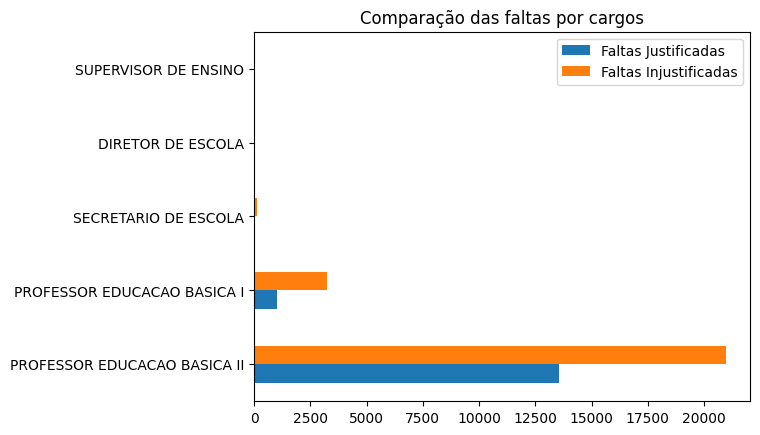

In [163]:
cargo_faltas = df.groupby('NOME_CARGO_EXERC')[['TT_DIAS_FALTA_JUST', 'TT_DIAS_FALTA_INJUST']].sum()
cargo_faltas['SUM'] = cargo_faltas['TT_DIAS_FALTA_INJUST'] + cargo_faltas['TT_DIAS_FALTA_JUST']
cargo_faltas = cargo_faltas.sort_values(by='SUM', ascending=False)
cargo_faltas.drop('SUM', axis=1).plot.barh()
plt.title('Comparação das faltas por cargos')
plt.legend(['Faltas Justificadas', 'Faltas Injustificadas'])
plt.ylabel('')
plt.show()